In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd

In [3]:
epl = pd.read_excel("/kaggle/input/project/EPL(Overall Points Ranking).xlsx")

In [4]:
epl.head()

,Champion,played,won,drawn,lost,gf,ga,gd,points,notes
0,1,1.0,42,24,12,6,67,31,36,84
1,2,0.0,42,21,11,10,57,40,17,74
2,3,0.0,42,21,9,12,61,65,-4,72
3,4,0.0,42,20,11,11,68,46,22,71
4,5,0.0,42,17,12,13,63,55,8,63


In [ ]:

# 1. IMPORT LIBRARIES

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np





# 3. TRAIN-TEST SPLIT

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# 4. LINEAR REGRESSION

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

lr_mae = mean_absolute_error(y_test, lr_pred)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
lr_r2 = r2_score(y_test, lr_pred)

print("===== Linear Regression =====")
print("MAE :", lr_mae)
print("RMSE:", lr_rmse)
print("R²   :", lr_r2)

# 5. RANDOM FOREST

rf = RandomForestRegressor(
    n_estimators=300,
    random_state=42
)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)

print("\n===== Random Forest =====")
print("MAE :", rf_mae)
print("RMSE:", rf_rmse)
print("R²   :", rf_r2)


# 6. XGBOOST REGRESSOR

xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
xgb_r2 = r2_score(y_test, xgb_pred)

print("\n===== XGBoost =====")
print("MAE :", xgb_mae)
print("RMSE:", xgb_rmse)
print("R²   :", xgb_r2)


===== Linear Regression =====
MAE : 1.6854199659841985e-14
RMSE: 2.1849350413509492e-14
R²   : 1.0


/tmp/ipykernel_48/928128518.py:46: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)



===== Random Forest =====
MAE : 1.836179487179487
RMSE: 2.856729601676367
R²   : 0.985908257711352

===== XGBoost =====
MAE : 1.8018130119030291
RMSE: 2.546447037411859
R²   : 0.9888031536678817


In [7]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train.values.ravel())
lr_pred = lr.predict(X_test)

# Random Forest
rf = RandomForestRegressor(n_estimators=300, random_state=42)
rf.fit(X_train, y_train.values.ravel())
rf_pred = rf.predict(X_test)

# XGBoost
xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
)
xgb.fit(X_train, y_train.values.ravel())
xgb_pred = xgb.predict(X_test)


In [8]:
# ================================
# 1. IMPORT LIBRARIES
# ================================
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# ================================
# 2. SELECT FEATURES AND TARGET
# ================================
X = epl[['won', 'drawn', 'lost', 'gf', 'ga', 'gd']]
y = epl[['points']]

# ================================
# 3. TRAIN-TEST SPLIT
# ================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ================================
# 4. LINEAR REGRESSION
# ================================
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

lr_mae = mean_absolute_error(y_test, lr_pred)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
lr_r2 = r2_score(y_test, lr_pred)

print("===== Linear Regression =====")
print("MAE :", lr_mae)
print("RMSE:", lr_rmse)
print("R²   :", lr_r2)

# ================================
# 5. RANDOM FOREST
# ================================
rf = RandomForestRegressor(
    n_estimators=300,
    random_state=42
)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)

print("\n===== Random Forest =====")
print("MAE :", rf_mae)
print("RMSE:", rf_rmse)
print("R²   :", rf_r2)

# ================================
# 6. XGBOOST REGRESSOR
# ================================
xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
xgb_r2 = r2_score(y_test, xgb_pred)

print("\n===== XGBoost =====")
print("MAE :", xgb_mae)
print("RMSE:", xgb_rmse)
print("R²   :", xgb_r2)


===== Linear Regression =====
MAE : 1.6854199659841985e-14
RMSE: 2.1849350413509492e-14
R²   : 1.0


/tmp/ipykernel_48/3143826980.py:48: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)



===== Random Forest =====
MAE : 1.836179487179487
RMSE: 2.856729601676367
R²   : 0.985908257711352

===== XGBoost =====
MAE : 1.8018130119030291
RMSE: 2.546447037411859
R²   : 0.9888031536678817


In [15]:
for var_name in names:
    value = globals().get(var_name)
    if isinstance(value, pd.DataFrame):
        print("DataFrame detected →", var_name)


DataFrame detected → _
DataFrame detected → epl
DataFrame detected → _4
DataFrame detected → X
DataFrame detected → y
DataFrame detected → X_train
DataFrame detected → X_test
DataFrame detected → y_train
DataFrame detected → y_test


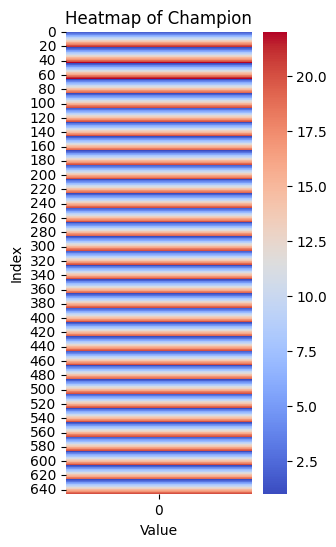

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


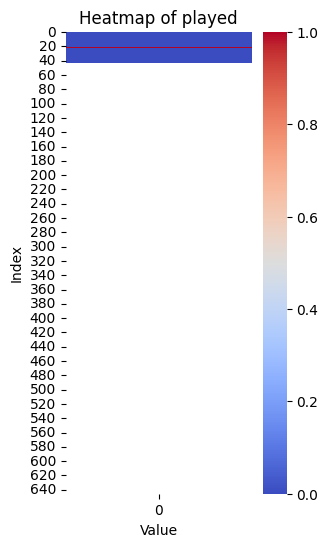

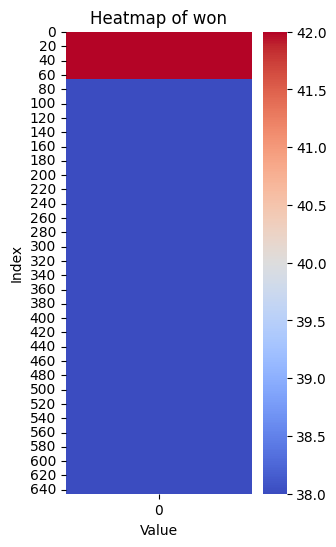

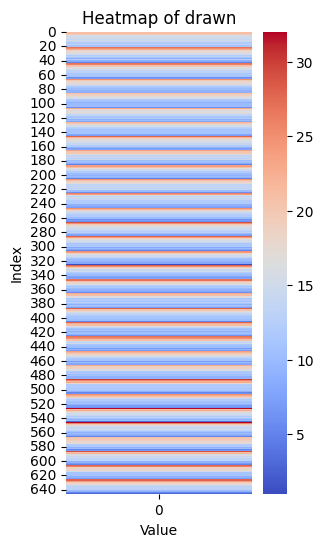

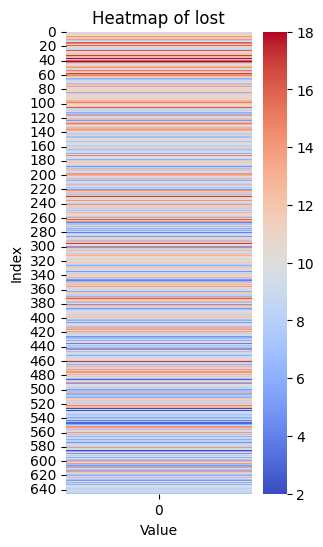

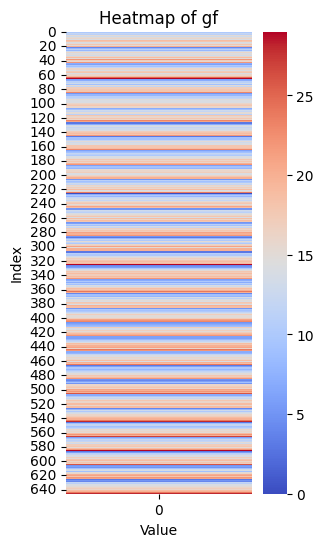

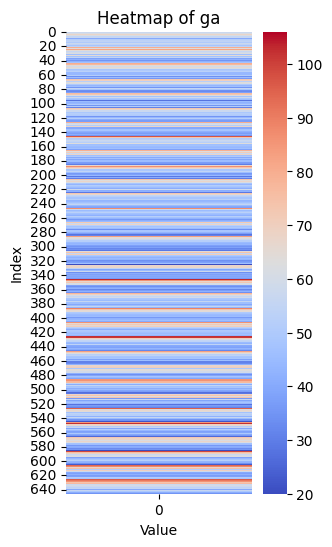

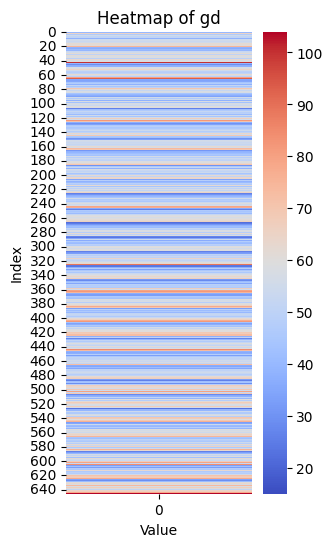

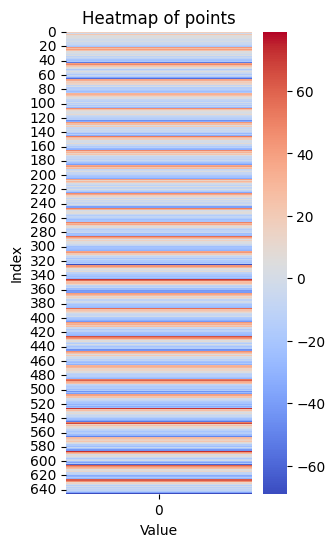

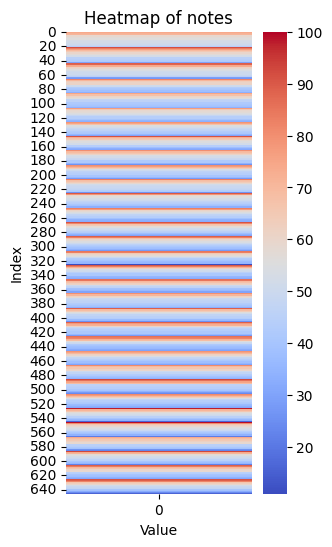

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

for col in epl.columns:
    plt.figure(figsize=(3, 6))
    sns.heatmap(
        epl[col].values.reshape(-1, 1), 
        cmap="coolwarm",
        cbar=True
    )
    plt.title(f"Heatmap of {col}")
    plt.xlabel("Value")
    plt.ylabel("Index")
    plt.show()


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


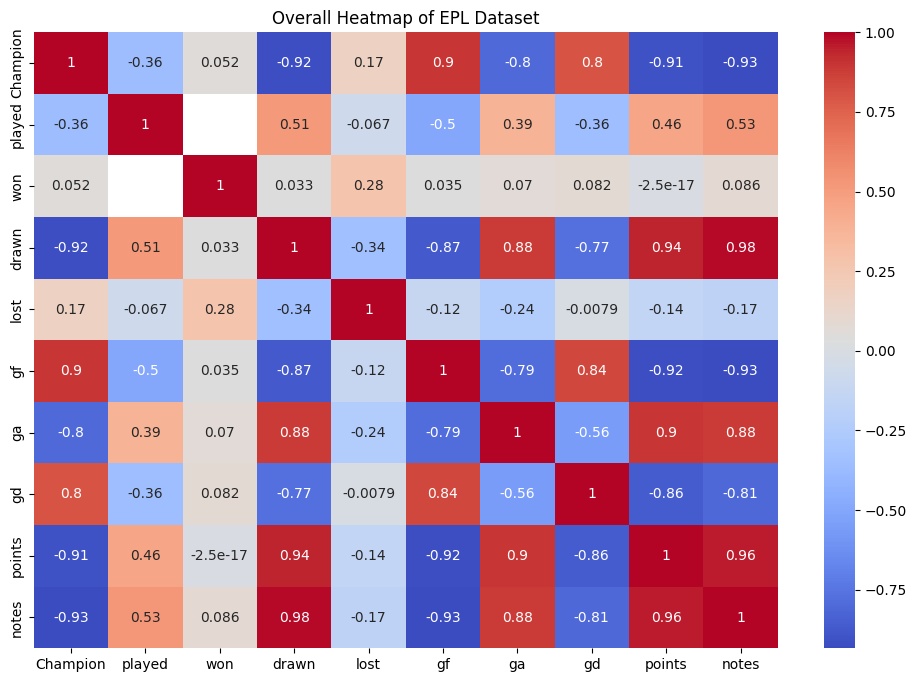

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(epl.corr(), annot=True, cmap="coolwarm")
plt.title("Overall Heatmap of EPL Dataset")
plt.show()


In [19]:
X = epl[['played','won','drawn','lost','gf','ga','gd']]
y = epl['points']

# Convert to numeric (important)
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

# Remove rows with NaN after conversion
X = X.dropna()
y = y.loc[X.index]


In [21]:
print(epl.dtypes)


Champion      int64
played      float64
won           int64
drawn         int64
lost          int64
gf            int64
ga            int64
gd            int64
points        int64
notes         int64
dtype: object


In [24]:
print(epl.head())

   Champion  played  won  drawn  lost  gf  ga  gd  points  notes
0         1     1.0   42     24    12   6  67  31      36     84
1         2     0.0   42     21    11  10  57  40      17     74
2         3     0.0   42     21     9  12  61  65      -4     72
3         4     0.0   42     20    11  11  68  46      22     71
4         5     0.0   42     17    12  13  63  55       8     63


In [27]:
import pandas as pd

# Take a snapshot of globals()
all_vars = list(globals().items())

for var, val in all_vars:
    if isinstance(val, pd.DataFrame):
        print("DataFrame →", var, val.shape)


DataFrame → _ (5, 10)
DataFrame → epl (646, 10)
DataFrame → _4 (5, 10)
DataFrame → X (646, 9)
DataFrame → X_train (516, 6)
DataFrame → X_test (130, 6)
DataFrame → y_train (516, 1)
DataFrame → y_test (130, 1)
DataFrame → data (646, 10)


In [32]:
# Always recreate X and y from the correct dataset
X = data.drop("points", axis=1)
y = data["points"]

print(X.shape, y.shape)


(646, 9) (646,)


In [34]:
# Recreate X and y cleanly

data = epl.copy()

# Remove any non-numeric columns if they exist
data = data.apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values, if any
data = data.dropna()

# Features (all except target)
X = data.drop("points", axis=1)

# Target (flatten to 1D)
y = data["points"].values

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (44, 9)
y shape: (44,)


In [35]:
from sklearn.feature_selection import SelectKBest, f_regression
import pandas as pd

# X = your feature dataframe
# y = your target

selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X, y)

scores = selector.scores_
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': scores
}).sort_values(by='Score', ascending=False)

feature_scores


,Feature,Score
8,notes,248.579657
3,drawn,162.578701
0,Champion,129.244426
5,gf,127.578577
7,gd,99.053705
6,ga,57.280049
1,played,11.366996
4,lost,0.656660
2,won,0.000000
